In [1]:
from IPython.display import HTML
from curses import meta
from enum import unique
from fileinput import filename
import itertools
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import vertex_model as model
import vertex_model.initialisation as init
from vertex_model.forces import TargetArea, Tension, Perimeter, Pressure
from matplotlib import animation, rc
import random
import dill
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from vertex_model import simulation_parser
from vertex_model.simulation_parser import *
import matplotlib
import gc
from ast import literal_eval
import scipy
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

from vertex_model import script_for_memory_issues
from vertex_model.script_for_memory_issues import *
matplotlib.rc('font', family='sansserif', serif='cm10')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
random.seed(123)

/tmp/ipykernel_889/832797636.py:33: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


In [2]:
simulation=index_of_simulation(model_type=1,k=100,r=0,d=0)
metadata_index=simulation[0][0]
experiment_metadata=make_metadata_dic()[metadata_index]
history=make_simulations_dic(metadata_index)
for i in range(0,len(history.values())):
    cells=list(history.values())[i]

look here aaryan. 4


RuntimeError: Requested MovieWriter (ffmpeg) not available

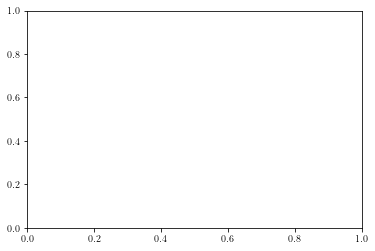

In [3]:
fig=plt.figure()
ax = fig.gca()
# initialization function: plot the background of each frame
def init_fig():
    ax = plt.figure()
    return (ax,)
# animation function. This is called sequentially
def animate_fig(i):
    cells_array=history
    v_max = np.max((np.max(cells_array[0].mesh.vertices), np.max(cells_array[-1].mesh.vertices)))
    size = 2.0*v_max
    cells= history[i]
    return model.draw(cells,ax,size)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,animate_fig, init_func=init_fig,
                               frames=len(history))
HTML(anim.to_html5_video())


